In [36]:
from scipy.io import wavfile
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift
import soundfile as sf

#KYW inst
#fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Sound Examples/KYW Inst.wav')
#ATF Drums
fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Sound Examples/Around the fur drums.wav')

# Get the bit depth of the audio data (assumes audio_data is a NumPy array)
bit_depth = data.dtype.itemsize * 8

# Calculate the scaling factor for normalization
scaling_factor = 2 ** (bit_depth - 1)  # For signed audio

# Convert audio data to floating-point values and normalize
data = data.astype(np.float32) / scaling_factor

# Verify that the data is now in the range -1 to 1
print(f"Min Value: {np.min(data)}")
print(f"Max Value: {np.max(data)}")

Min Value: -1.0
Max Value: 0.999969482421875


In [37]:
#sd.play(data, fs)

/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_13907/1738035919.py:19: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, fs/2])  # Set x-axis limits
/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_13907/1738035919.py:29: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, fs/2])  # Set x-axis limits


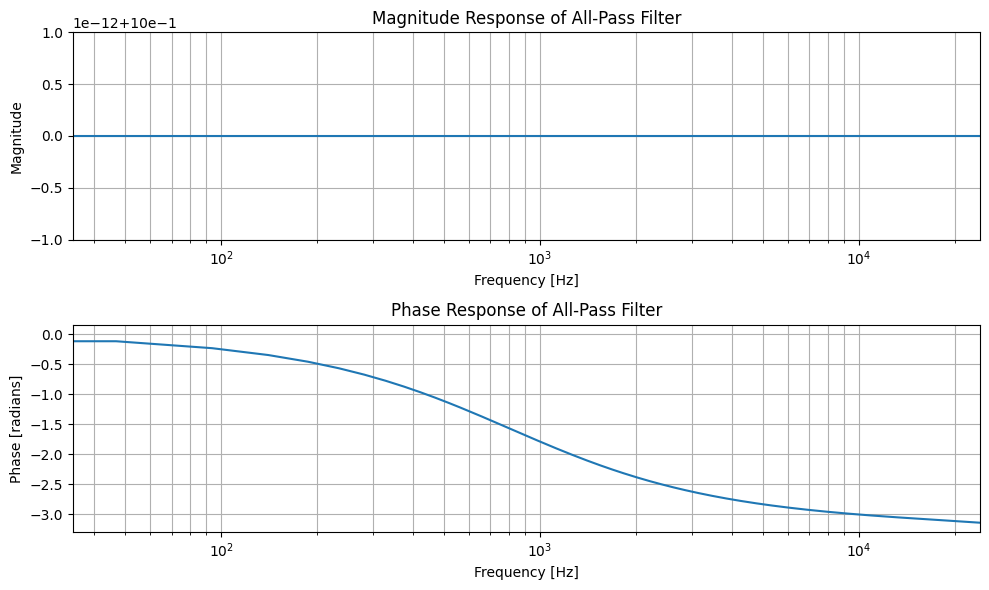

In [38]:
a1 = -0.9
num = [a1, 1]
den = [1, a1]

w1, H1 = signal.freqz(num, den)

# Convert frequencies to Hz
freq_hz = w1 * (fs / (2 * np.pi))

# Plot magnitude and phase responses in Hz
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_hz, np.abs(H1))
plt.title('Magnitude Response of All-Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(which='both')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlim([0, fs/2])  # Set x-axis limits


plt.subplot(2, 1, 2)
plt.plot(freq_hz, np.angle(H1))
plt.title('Phase Response of All-Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid(which='both')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlim([0, fs/2])  # Set x-axis limits


plt.tight_layout()
plt.show()

In [39]:
M = 75

dataCpyL = data[:,0]
dataCpyR = data[:,1]

for i in range(1, M):
    data_filtL = signal.lfilter(num, den, dataCpyL)
    data_filtR = signal.lfilter(num, den, dataCpyR)
    dataCpyL = data_filtL
    dataCpyR = data_filtR


#
stereoFiltered = np.vstack((dataCpyL, dataCpyR))
stereoFiltered = np.transpose(stereoFiltered) 


In [40]:
sd.play(stereoFiltered, fs)

In [43]:
#Write to wav file
#sf.write('SpectralDelay_75APF_ATF.wav', stereoFiltered, fs)

/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_13907/1004670092.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times0, frequencies0, 10 * np.log10(Sxx0), shading='auto')


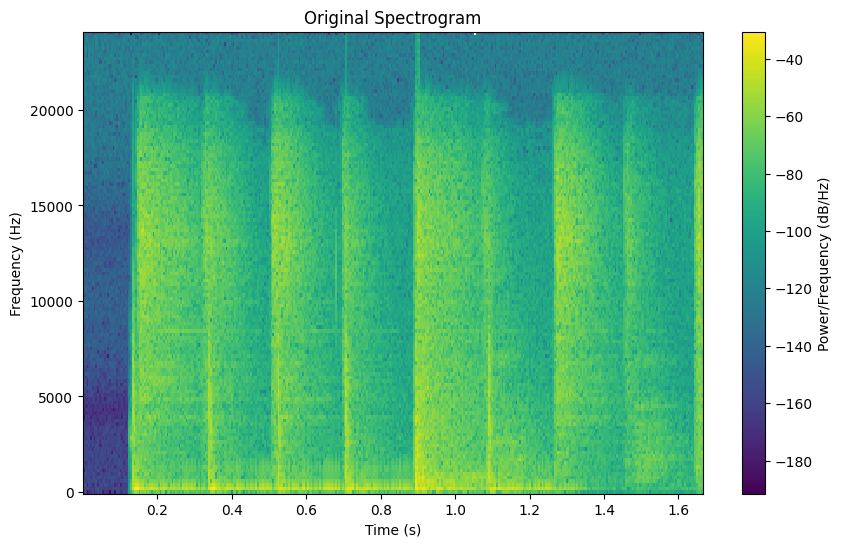

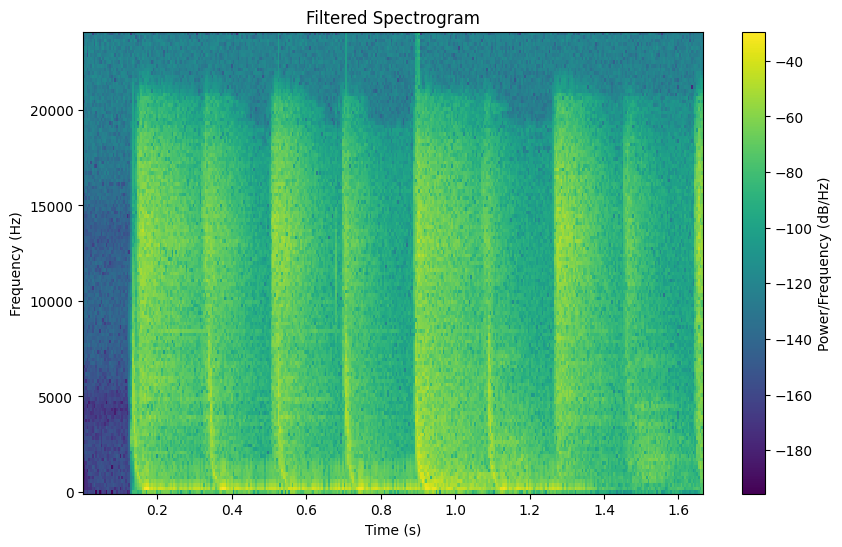

In [42]:
# Compute the spectrogram
frequencies0, times0, Sxx0 = signal.spectrogram(data[0:80000,0], fs)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times0, frequencies0, 10 * np.log10(Sxx0), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('Original Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

# Compute the spectrogram
frequencies, times, Sxx = signal.spectrogram(stereoFiltered[0:80000,0], fs)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('Filtered Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()